In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


**Data Understanding** :

This dataset contains information about general information and detail of each passengers.The dataconsists of demographic and traveling information for 418 of the Titanic passengers, and the goal is to predict the survival of these passengers.

 1. Pclass: Passenger class (1 = 1st; 2 = 2nd; 3 = 3rd)

 2. Survival: A Boolean indicating whether the passenger
    survived or not (0 = No; 1 = Yes); this is our target

 3. Name: A field rich in information as it contains title and family names.

 4. Sex: male/female.

 5. Age: Age, asignificant portion of values are missing.

 6. Sibsp: Number of siblings/spouses aboard.

 7. Parch: Number of parents/children aboard.

 8. Ticket: Ticket number.

 9. Fare: Passenger fare (British Pound).

 10. Cabin: Doesthe location of the cabin influence chances of survival?

 11. Embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)













**DATA** **COLLECTION**:

In [ ]:
data=pd.read_csv('/content/tested.csv')

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


**Describing** **data**

In [ ]:
data.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S


In [ ]:
#shows dimensionality
data.shape

(418, 12)

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
data.iloc[0:4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


In [ ]:
#to see the missing values
data.count()

PassengerId    418
Survived       418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [ ]:
#show unique values
data['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [ ]:
#show counts
data['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [ ]:
data['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

**Data - Cleansing**

**Treating Missing Values**

In [ ]:
#fillling age by mean value
mean_age = data['Age'].mean()
data['Age'].fillna(mean_age, inplace=True)

In [ ]:
#filling fare by mean value
mean_fare = data['Fare'].mean()
data['Fare'].fillna(mean_fare,inplace=True)

**Changing Values and Datatypes for our Comfort Analysis**

In [ ]:
#Changing values

In [ ]:
data['Embarked'] = data['Embarked'].map( {'Q': 0,'S':1,'C':2}).astype(int)
data['Sex'] = data['Sex'].map( {'female': 1,'male':0}).astype(int)

In [ ]:
#Changing Datatypes
data['Age'] = data['Age'].astype(int)
data['Fare'] = data['Fare'].astype(int)

In [ ]:
data.dtypes

PassengerId     int64
Survived        int64
Pclass          int64
Name           object
Sex             int64
Age             int64
SibSp           int64
Parch           int64
Ticket         object
Fare            int64
Cabin          object
Embarked        int64
dtype: object

**Dropping Unwanted Features**

In [ ]:
data.drop(["PassengerId","Name","Cabin","Ticket"],axis=1,inplace=True)

In [ ]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34,0,0,7,0
1,1,3,1,47,1,0,7,1
2,0,2,0,62,0,0,9,0
3,0,3,0,27,0,0,8,1
4,1,3,1,22,1,1,12,1


**Data Visualization**

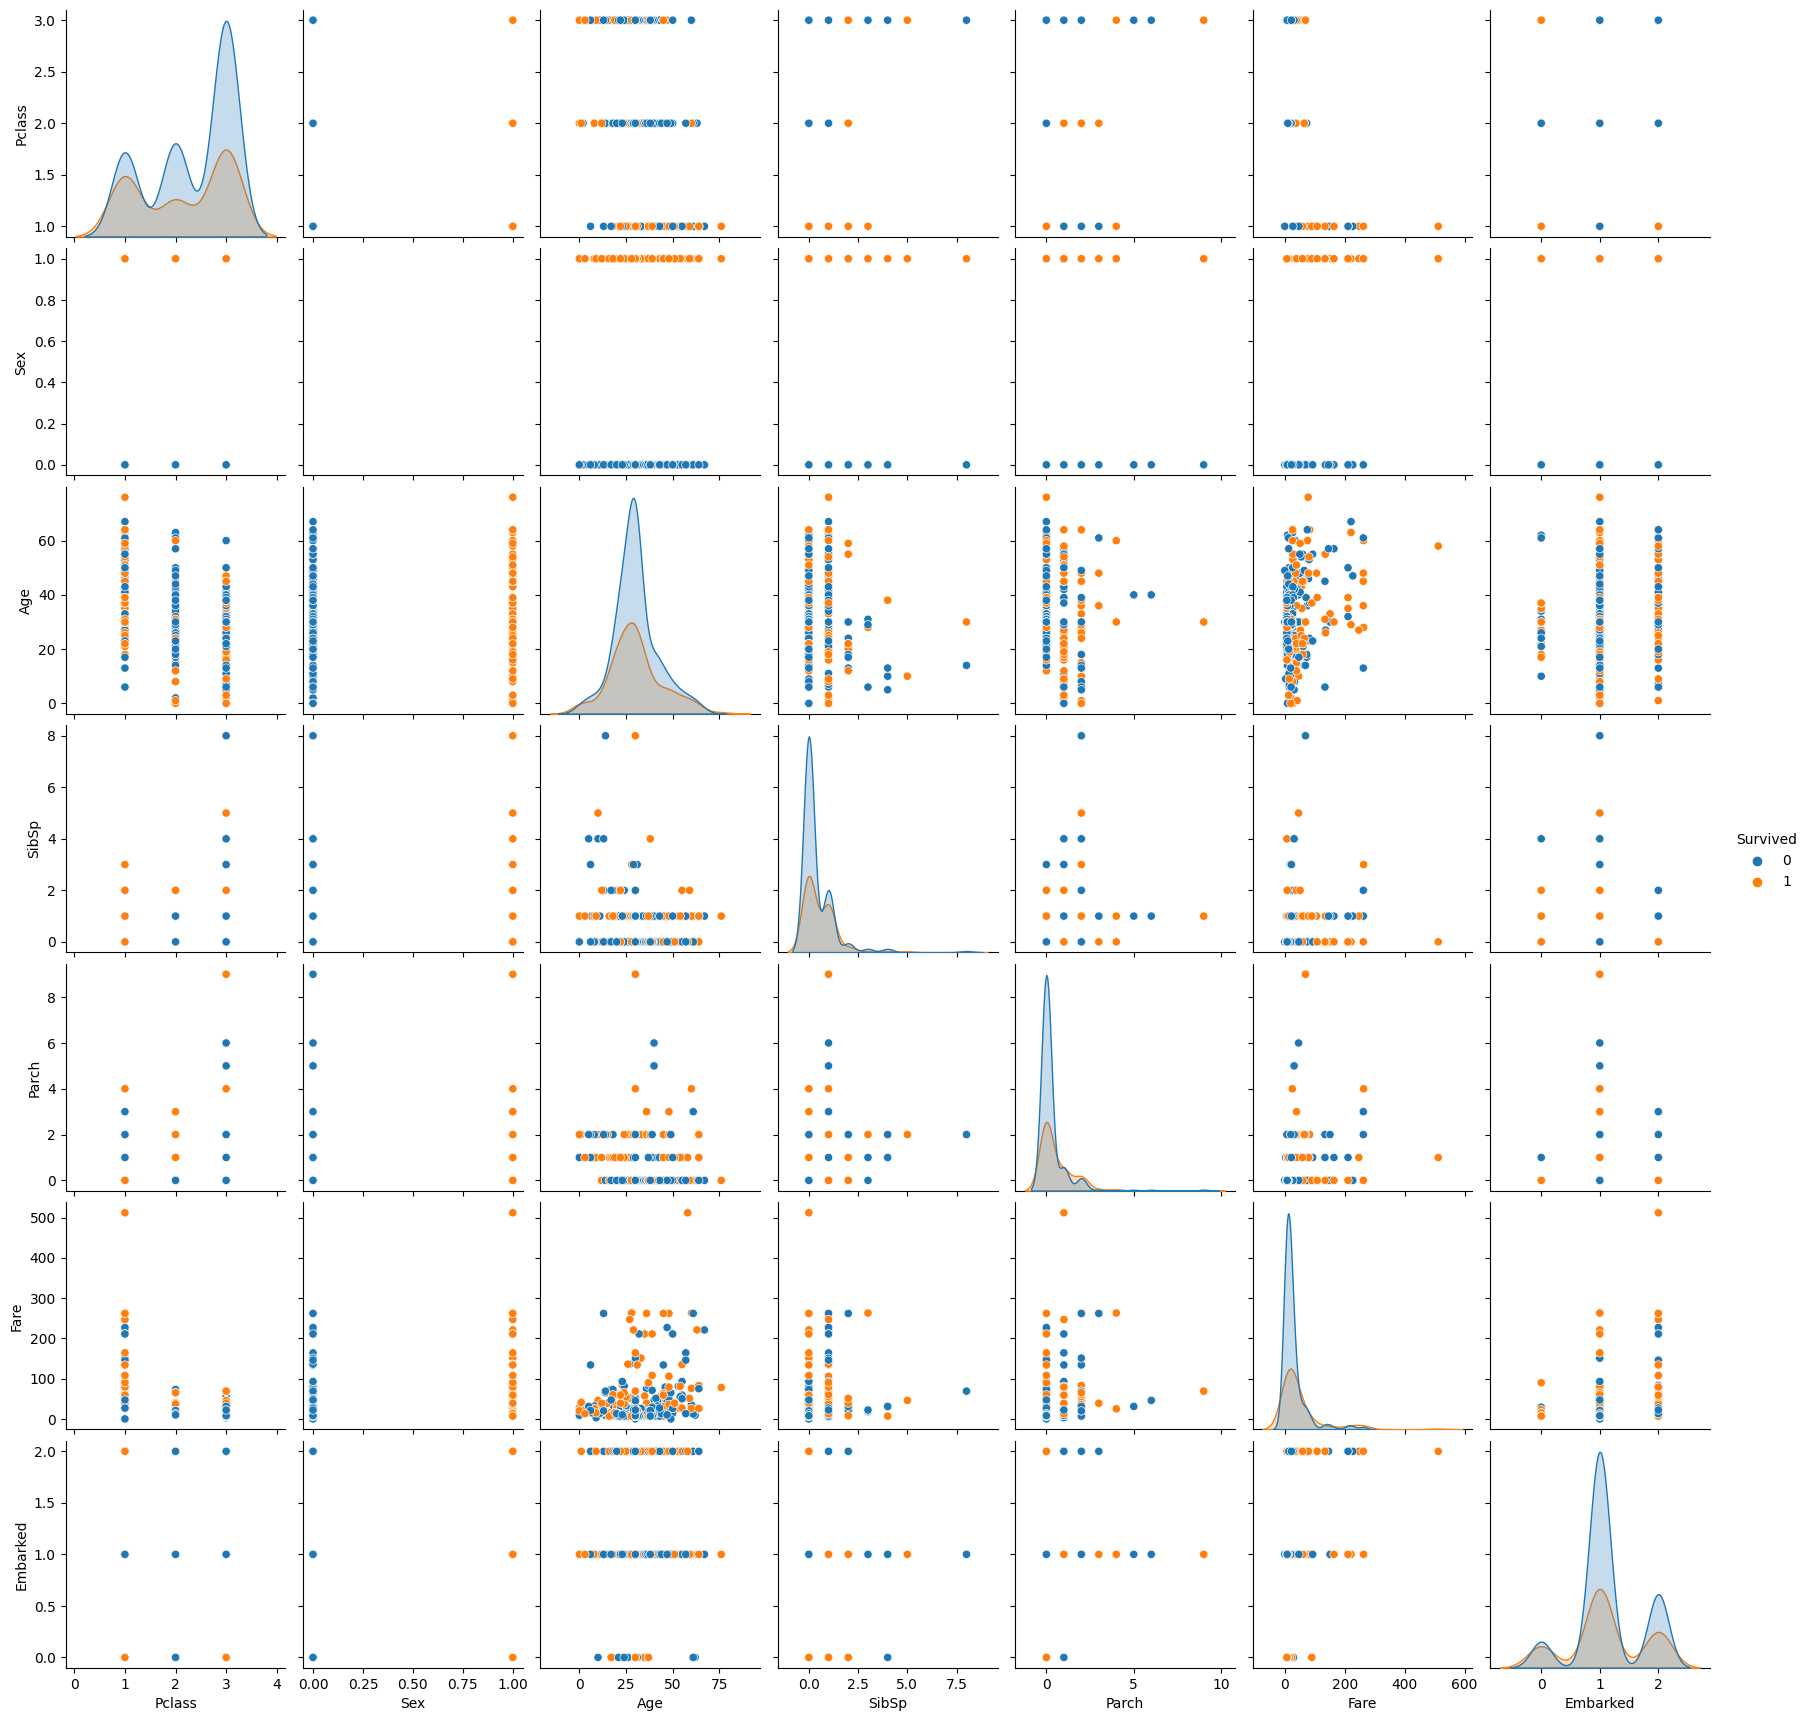

In [ ]:
sns.pairplot(data,hue='Survived')
plt.show()

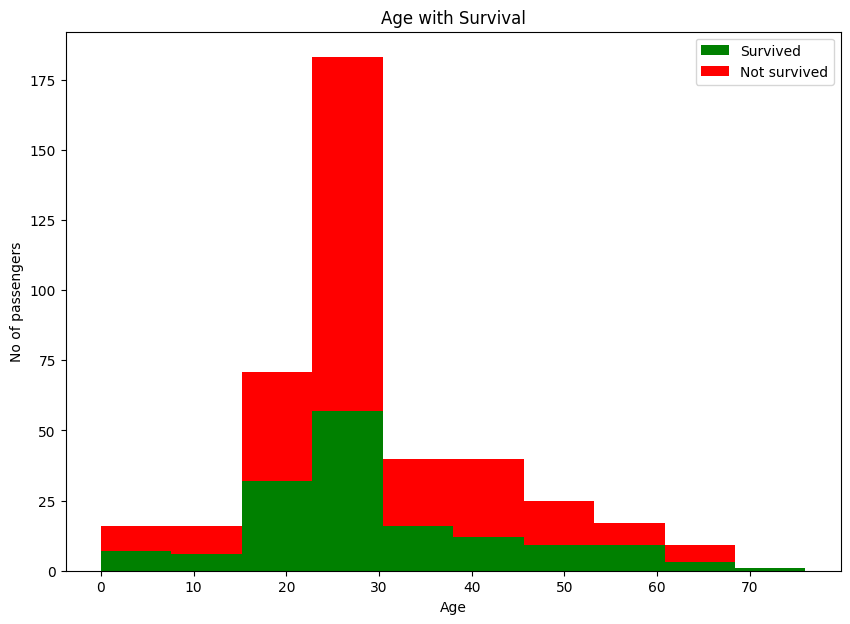

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))
plt.hist(x = [data[data['Survived']==1]['Age'], data[data['Survived']==0]['Age']],stacked=True, color = ['g','r'],label = ['Survived','Not survived'])
plt.title('Age with Survival')
plt.xlabel('Age')
plt.ylabel('No of passengers')
plt.legend()

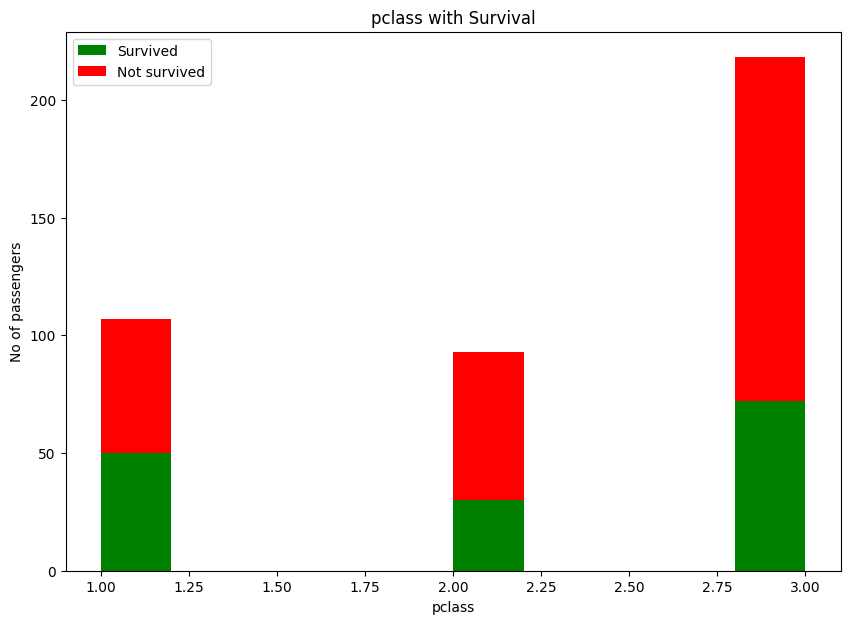

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))
plt.hist(x = [data[data['Survived']==1]['Pclass'], data[data['Survived']==0]['Pclass']],stacked=True, color = ['g','r'],label = ['Survived','Not survived'])
plt.title('pclass with Survival')
plt.xlabel('pclass')
plt.ylabel('No of passengers')
plt.legend()

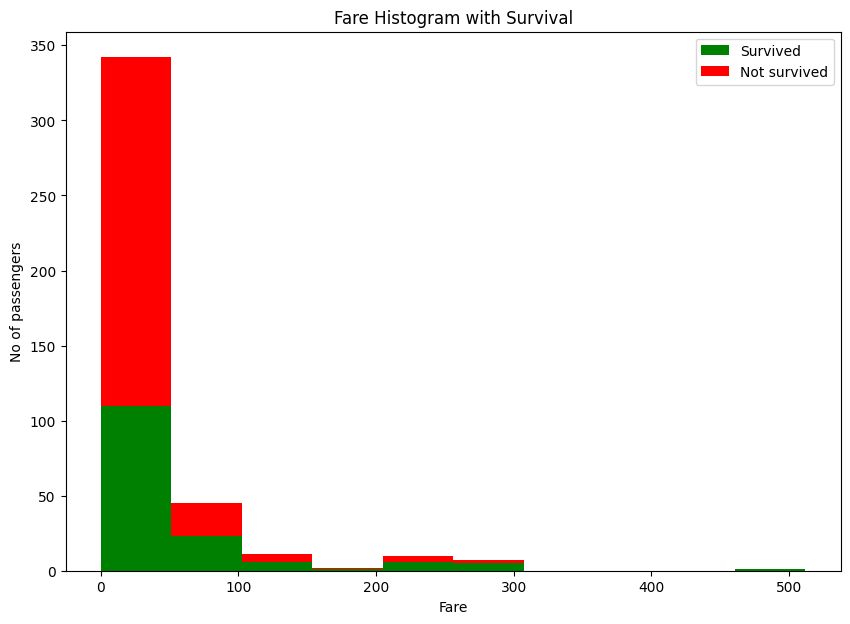

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.hist(x = [data[data['Survived']==1]['Fare'], data[data['Survived']==0]['Fare']], stacked=True, color = ['g','r'],label = ['Survived','Not survived'])
plt.title('Fare Histogram with Survival')
plt.xlabel('Fare')
plt.ylabel('No of passengers')
plt.legend()

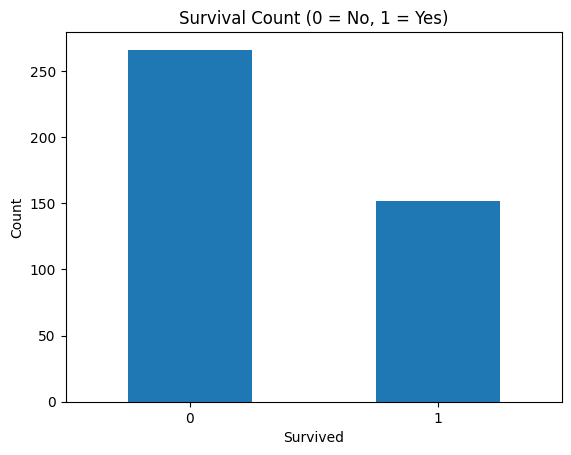

In [ ]:

column = 'Survived'

# Create a bar chart
survival_counts = data[column].value_counts()
survival_counts.plot(kind='bar', rot=0)

# Adding labels and title
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count (0 = No, 1 = Yes)')

# Show the plot
plt.show()


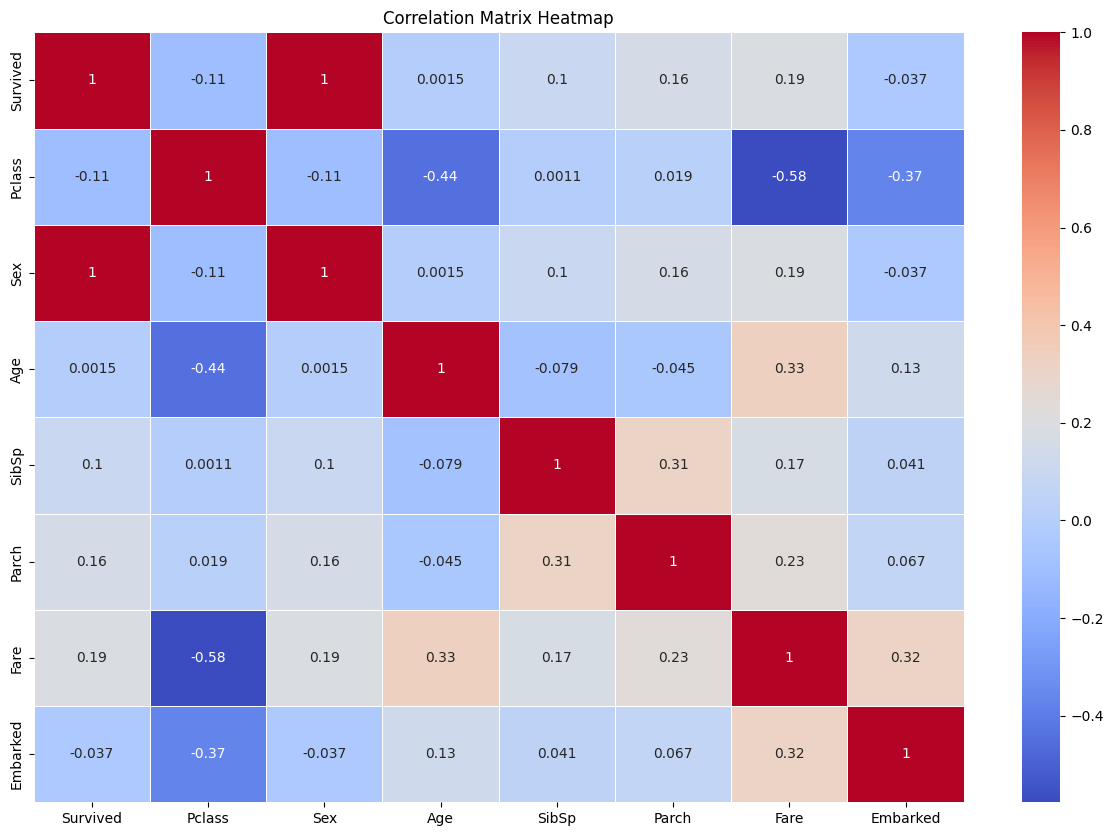

In [ ]:
#Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


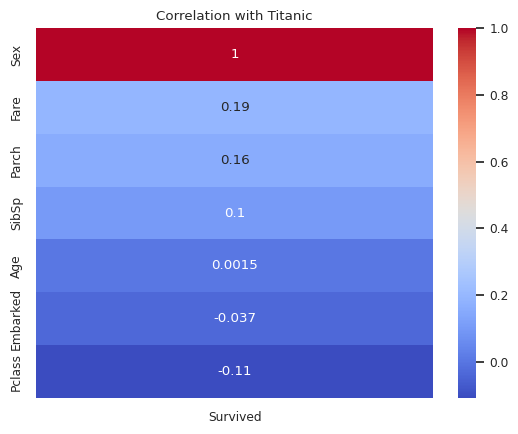

In [ ]:
#Target
corr = data.corr()
target_corr = corr['Survived'].drop('Survived')
# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)
# Create a heatmap of the correlations with the target column
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True)
plt.title('Correlation with Titanic')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
x = data.iloc[:,data.columns!='Survived']
y=data.iloc[:,data.columns=='Survived']

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(xtrain,ytrain.values.ravel())
predict_output = model.predict(xtest)
print(predict_output)

from sklearn.metrics import accuracy_score
acc=accuracy_score(predict_output,ytest)
print('The Accuracy Score for RandomForestClassifier:',acc)


[1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1
 1 0 0 0 0 1 1 0 0 0]
The Accuracy Score for RandomForestClassifier: 1.0


**DATA MODELLING**

In [ ]:
X = data.drop('Survived', axis=1)
y = data['Survived']


In [ ]:
#splitting train and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [ ]:
print('Shape of training feature:', X_train.shape)
print('Shape of training feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)


Shape of training feature: (209, 7)
Shape of training feature: (209, 7)
Shape of training label: (209,)
Shape of training label: (209,)


In [ ]:
#standardizing the feature
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
 # Initialize the model (e.g., Logistic Regression)
model = LogisticRegression()


In [ ]:
# Train the model on the training data
model.fit(X_train, y_train)



LogisticRegression()

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)


Accuracy: 1.0


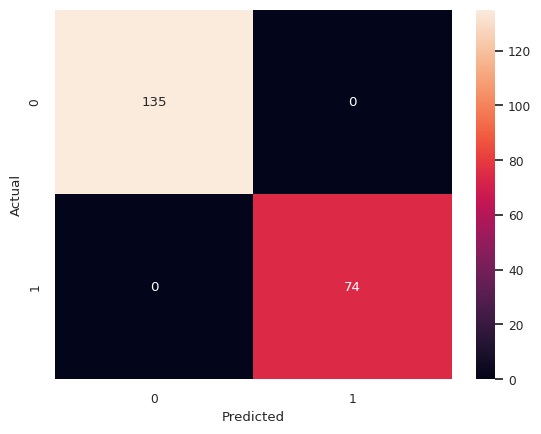

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       1.00      1.00      1.00        74

    accuracy                           1.00       209
   macro avg       1.00      1.00      1.00       209
weighted avg       1.00      1.00      1.00       209



In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred)
print(class_report)


**Another model validation**

In [ ]:
from sklearn.model_selection import train_test_split
x = data.iloc[:,data.columns!='Survived']
y=data.iloc[:,data.columns=='Survived']

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(xtrain,ytrain.values.ravel())
predict_output = model.predict(xtest)
print(predict_output)

from sklearn.metrics import accuracy_score
acc=accuracy_score(predict_output,ytest)
print('The Accuracy Score for RandomForestClassifier:',acc)


[0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 0 0]
The Accuracy Score for RandomForestClassifier: 1.0


In [ ]:
 #Correlation Matrix
data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.108615,1.000000,0.001538,0.099943,0.159120,0.191156,-0.037432
Pclass,-0.108615,1.000000,-0.108615,-0.443531,0.001087,0.018721,-0.577438,-0.372344
Sex,1.000000,-0.108615,1.000000,0.001538,0.099943,0.159120,0.191156,-0.037432
Age,0.001538,-0.443531,0.001538,1.000000,-0.079203,-0.045259,0.328407,0.127749
SibSp,0.099943,0.001087,0.099943,-0.079203,1.000000,0.306895,0.171884,0.041221
Parch,0.159120,0.018721,0.159120,-0.045259,0.306895,1.000000,0.230308,0.067474
Fare,0.191156,-0.577438,0.191156,0.328407,0.171884,0.230308,1.000000,0.315937
Embarked,-0.037432,-0.372344,-0.037432,0.127749,0.041221,0.067474,0.315937,1.000000


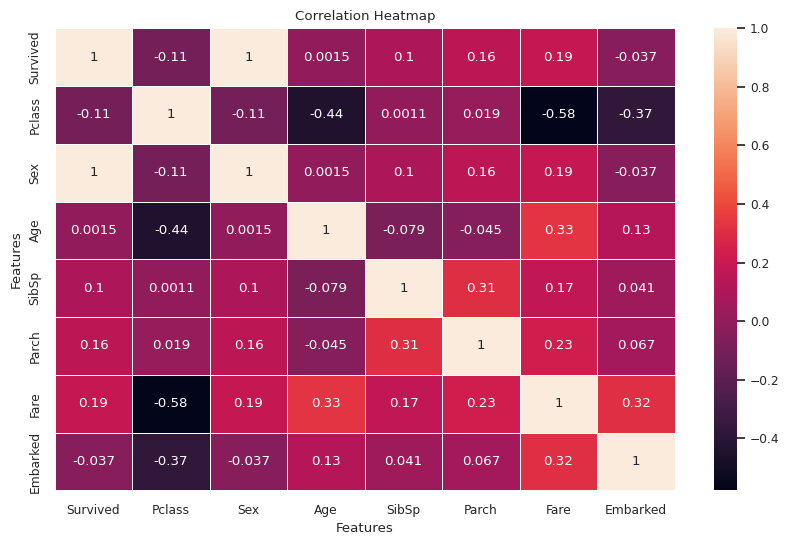

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot = True, cmap = 'rocket', linewidths = 0.5)
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()


Looking at the correlation results, we can see that different Features have varying degrees of correlation with the outcome (Survived).

1. Sex: With a correlation of 1.0, this is the most strongly correlated feature with the outcome. This suggests that Sex is the important factor that describe the survival rate between male and female.

2. Fare: This feature has a correlation of 0.19 with the outcome. While not as strong as sex, this is still a moderate correlation, suggesting that fare is directly-proportional to Passengerclass (1st,2nd,3rd) could also be an important factor in Survival.

3. Age : Age has a correlation of 0.015 with the outcome. This suggests that older individuals may have low chance of Survival.